# LAB1 Titanic : Machine Learning from Disaster

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
<br><br>
In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive.
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

<b>Data dictionary</b>


<b>1. Survived</b> is outcome or dependent variable. (0 for did not survive,1 for survived )

<b>2. Pclass</b> is ticket class, (1 = upper class, 2 = middle class, and 3 = lower class)

<b>3. Title</b> is passanger's title

<b>4. Sex</b> 

<b>5. Age</b> 

<b>6. SibSp</b> is number of related siblings/spouse aboard

<b>7. Parch</b> is number of related parents/children aboard

<b>8. FamilySize</b> is total number of family members aboard

<b>9. Fare</b> 

<b>10. Cabin</b> (0 = did't have Cabin, 1 = have Cabin)

<b>11. Embarked</b> 

***
### Import Libraries

__Python library__: is a collection of functions and methods that allows you to perform many actions without writing your code.<br>
- __numpy __ :
A fundamental package for scientific computing with Python. It adds Python support for large, multi-dimensional arrays and matrices, along with a large library of high-level mathematical functions to operate on these arrays. [Documentation](http://www.numpy.org)

- __pandas __ : 
A software library written for data manipulation and analysis in Python. It offers data structures and operations for manipulating numerical tables and time series. It is good for analyzing tabular data. You can use it for exploratory data analysis, statistics, visualization. [Documentation](https://pandas.pydata.org)

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

### Import dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [2]:
df = pd.read_csv('titanic.csv')
df.head(10)

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,FamilySize,Fare,Cabin,Embarked
0,0,3,Mr,male,22.000000,1,0,2,7.2500,0,S
1,1,1,Mrs,female,38.000000,1,0,2,71.2833,1,C
2,1,3,Miss,female,26.000000,0,0,1,7.9250,0,S
3,1,1,Mrs,female,35.000000,1,0,2,53.1000,1,S
4,0,3,Mr,male,35.000000,0,0,1,8.0500,0,S
5,0,3,Mr,male,29.699118,0,0,1,8.4583,0,Q
6,0,1,Mr,male,54.000000,0,0,1,51.8625,1,S
7,0,3,Master,male,2.000000,3,1,5,21.0750,0,S
8,1,3,Mrs,female,27.000000,0,2,3,11.1333,0,S
9,1,2,Mrs,female,14.000000,1,0,2,30.0708,0,C


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

### No.records , No.columns

In [3]:
df.shape

(891, 11)

### Labels : Survived

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df['Survived'].value_counts()/df.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

### Data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Title       891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   FamilySize  891 non-null    int64  
 8   Fare        891 non-null    float64
 9   Cabin       891 non-null    int64  
 10  Embarked    891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


### Numerical variables 

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,FamilySize,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,1.904602,32.204208,0.228956
std,0.486592,0.836071,13.002015,1.102743,0.806057,1.613459,49.693429,0.420397
min,0.000000,1.000000,0.420000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,1.000000,7.910400,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,1.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,2.000000,31.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,11.000000,512.329200,1.000000


### Missing Value

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Title         0
Sex           0
Age           0
SibSp         0
Parch         0
FamilySize    0
Fare          0
Cabin         0
Embarked      0
dtype: int64

### Dummy variables

In [4]:
df_dummy = pd.get_dummies(df)
df_dummy.head()

,Survived,Pclass,Age,SibSp,Parch,FamilySize,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,2,7.2500,0,0,0,1,0,0,0,1,0,0,1
1,1,1,38.0,1,0,2,71.2833,1,0,0,0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,7.9250,0,0,1,0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,2,53.1000,1,0,0,0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,1,8.0500,0,0,0,1,0,0,0,1,0,0,1


In [ ]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   FamilySize    891 non-null    int64  
 6   Fare          891 non-null    float64
 7   Cabin         891 non-null    int64  
 8   Title_Master  891 non-null    uint8  
 9   Title_Miss    891 non-null    uint8  
 10  Title_Mr      891 non-null    uint8  
 11  Title_Mrs     891 non-null    uint8  
 12  Title_Rare    891 non-null    uint8  
 13  Sex_female    891 non-null    uint8  
 14  Sex_male      891 non-null    uint8  
 15  Embarked_C    891 non-null    uint8  
 16  Embarked_Q    891 non-null    uint8  
 17  Embarked_S    891 non-null    uint8  
dtypes: float64(2), int64(6), uint8

# -----------------------Model---------------------------

# Split training data and  test data 
__scikit-learn__
: A machine learning library in Python. See docement here: https://scikit-learn.org/

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
outcomename = 'Survived'
X = df_dummy.drop(columns = outcomename)
Y = df_dummy[outcomename]

featurename = X.columns
outcome_value = ["0","1"]

In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,FamilySize,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,2,7.2500,0,0,0,1,0,0,0,1,0,0,1
1,1,38.0,1,0,2,71.2833,1,0,0,0,1,0,1,0,1,0,0
2,3,26.0,0,0,1,7.9250,0,0,1,0,0,0,1,0,0,0,1
3,1,35.0,1,0,2,53.1000,1,0,0,0,1,0,1,0,0,0,1
4,3,35.0,0,0,1,8.0500,0,0,0,1,0,0,0,1,0,0,1


In [ ]:
Y[0:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

__train_test_split()__: This is the function for splitting arrays or matrices into random train and test subsets. Some important parameters are:<br>
- __*arrays__ :  Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes. 
- __test_size (default=0.25)__ :  If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.. 
- __random_state__ : a pseudo-random number generator state used for random sampling.
- __stratify (default=None) __ : Array-like
If not None, data is split in a stratified fashion, using this as the class labels. (It relies on the StratifiedShuffleSplit function to do the split. [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html)

Futher information: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [7]:

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 1234, stratify = Y)
print('training set = {} records, test set= {} records'.format(X_train.shape[0],X_test.shape[0]))

training set = 712 records, test set= 179 records


In [ ]:
y_train.value_counts()/y_train.shape[0]

0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [ ]:
y_test.value_counts()/y_test.shape[0]

0    0.614525
1    0.385475
Name: Survived, dtype: float64

***
# <center><font color=green>Decision tree </font></center>

In [11]:
from sklearn.tree import DecisionTreeClassifier

__DecisionTreeClassifier()__: This is the classifier function for DecisionTree. It is the main function for implementing the algorithms. Some important parameters are:<br>
- __criterion (default=“gini”)__ : the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. 
- __max_depth (default=None)__ : The maximum depth of the tree.
- __min_samples_split (default=2)__ : The minimum number of samples required to split an internal node
- __min_samples_leaf (default=1)__ : The minimum number of samples required to be at a leaf node.

### Train decision tree

In [17]:
DTree_Clf = DecisionTreeClassifier(criterion="entropy")
DTree_Clf = DTree_Clf.fit(X_train, y_train)

### Decision Tree Visualization

__Python Library__
- __IPython __ 
stands for : "Interactive Python". It provides a rich architecture for interactive computing (Python interpreter) [Documentation](https://ipython.org))
- __PyDotPlus __ 
provides a Python Interface to Graphviz’s Dot language. [Documentation](https://pydotplus.readthedocs.io))

In [18]:
def Tree_visulization(tree,feature_names = featurename,class_names = outcomename):
#    from sklearn.externals.six import StringIO    
    from six import StringIO  
    from sklearn.tree import export_graphviz
    from IPython.display import Image
    import pydotplus
  
    
    
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data,
                    feature_names = featurename,
                    class_names = outcome_value,
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.set_size('"10,10!"')
    return Image(graph.create_png())

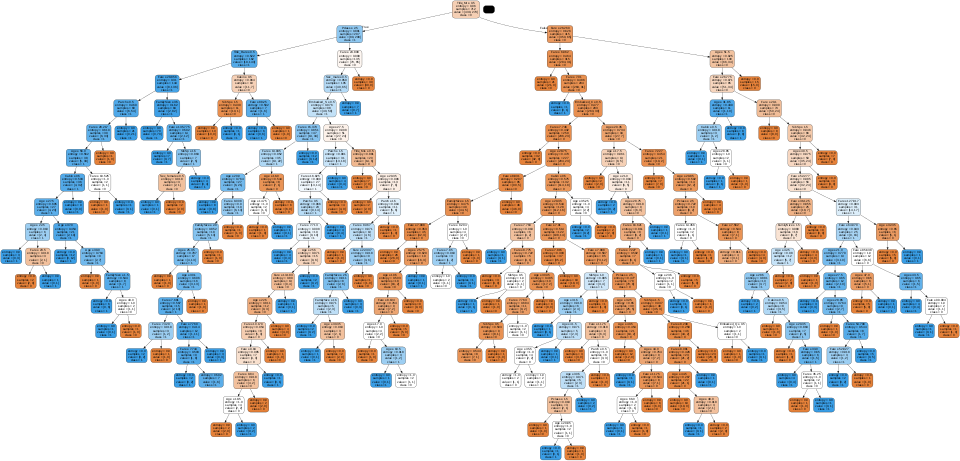

In [19]:
Tree_visulization(DTree_Clf)

###  Max_depth 

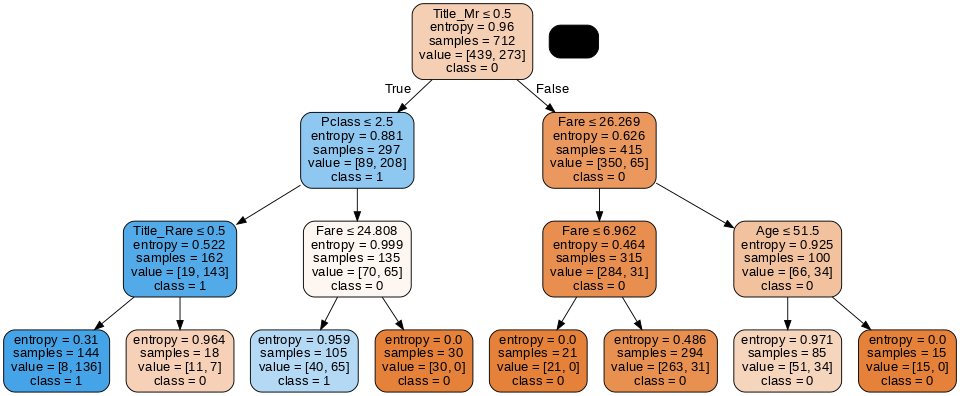

In [20]:
DTree_Clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
DTree_Clf2.fit(X_train, y_train)
Tree_visulization(DTree_Clf2)

### Prediction

In [21]:
y_pred_train = DTree_Clf2.predict(X_train)
y_pred_test = DTree_Clf2.predict(X_test)

y_predprob_train = DTree_Clf2.predict_proba(X_train)
y_predprob_test = DTree_Clf2.predict_proba(X_test)

In [22]:
print('Test set record')
print('Actual class of a test record : {}'.format(y_test.values[0]))
print('Class prediction : {}'.format(y_pred_test[0]))
print('Probability prediction : {}'.format(y_predprob_test[0]))

Test set record
Actual class of a test record : 0
Class prediction : 0
Probability prediction : [0.6 0.4]


***
# Evaluation: Confusion metrix, Accuracy, Balance Accuracy  Precision, Recall

__Python Library__
- __Matplotlib __ 
is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. [Documentation](https://matplotlib.org)
- __Seaborn __ 
is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. [Documentation](https://seaborn.pydata.org)

In [23]:

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, classification_report, precision_score, recall_score

# Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

### Accuracy

In [24]:
print("Training set | Accuracy is", accuracy_score(y_train,y_pred_train)*100)
print("Test set     | Accuracy is", accuracy_score(y_test,y_pred_test)*100)

Training set | Accuracy is 83.14606741573034
Test set     | Accuracy is 81.56424581005587


### Balance Accuracy

In [25]:
print("Training set | balanced_accuracy is", balanced_accuracy_score(y_train,y_pred_train)*100)
print("Test set     | balanced_accuracy is", balanced_accuracy_score(y_test,y_pred_test)*100)

Training set | balanced_accuracy is 81.34621642594308
Test set     | balanced_accuracy is 79.59815546772069


### Confusion metrix

In [26]:
train_cm = confusion_matrix(y_train,y_pred_train)
test_cm = confusion_matrix(y_test,y_pred_test)

print(train_cm)
print('---------------')
print(test_cm)

[[391  48]
 [ 72 201]]
---------------
[[97 13]
 [20 49]]


 Confusion metrix plot

		__Training set__


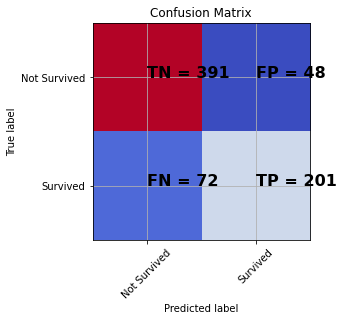

		__Test set__


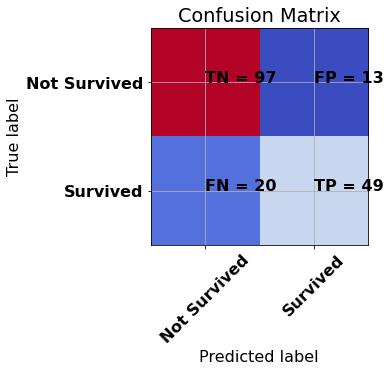

In [27]:
###################################### Visualization ######################################
def cm_plot(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.coolwarm)
    classNames = ['Not Survived','Survived']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    plt.grid(None)
    plt.rcParams.update({'font.size': 16})
    plt.rcParams["font.weight"] = "bold"
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
############################################################################
print('\t\t__Training set__')
cm_plot(train_cm)
print('\t\t__Test set__')
cm_plot(test_cm)

### Precision & Recall

In [28]:
print(classification_report(y_train, y_pred_train))
print("----------------------------------------------------")
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       439
           1       0.81      0.74      0.77       273

    accuracy                           0.83       712
   macro avg       0.83      0.81      0.82       712
weighted avg       0.83      0.83      0.83       712

----------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



__Reported Average Value__
- __micro average __:
Calculate metrics globally by counting the total true positives, false negatives and false positives.
- __macro average __: 
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
- __macro average __: 
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

See [precision_recall_fscore_support](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support) for more details on averages.



<a id= 'nb'><a>
***
# <center><font color=green> Naive Bayes </font></center>


__GaussianNB__ Some important parameters are:
- __priors__ : Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
- __var_smoothing (default=1e-9)__ : Portion of the largest variance of all features that is added to variances for calculation stability.

In [ ]:
from sklearn.naive_bayes import GaussianNB

### Train GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

### Prediction

In [ ]:
NB_y_pred_train = gnb.predict(X_train)
NB_y_pred_test = gnb.predict(X_test)
NB_y_pred_test[0:5]

array([0, 0, 0, 0, 1])

In [ ]:
print('Target classes of the first five rows are {}'.format(y_test.values[0:5]))
print('Predicted classes of the first five rows are {}'.format(NB_y_pred_test[0:5]))

Target classes of the first five rows are [0 0 0 0 1]
Predicted classes of the first five rows are [0 0 0 0 1]


### Evaluation

Test set | Accuracy is 80.44692737430168
Test set | Balance Accuracy is 80.03952569169961



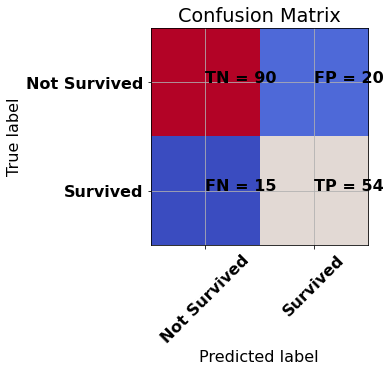

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       110
           1       0.73      0.78      0.76        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179



In [ ]:
test_acc = accuracy_score(y_test,NB_y_pred_test)*100
test_bl_acc = balanced_accuracy_score(y_test,NB_y_pred_test)*100
test_cm = confusion_matrix(y_test,NB_y_pred_test)
test_report = classification_report(y_test,NB_y_pred_test)

print("Test set | Accuracy is", test_acc)
print("Test set | Balance Accuracy is", test_bl_acc)
print("")
cm_plot(test_cm)
print(test_report)

<a id= 'knn'><a>
***
# <center><font color=green> K-nearest neighbors algorithm (K-NN) </font></center>



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

__KNeighborsClassifier__ : Classifier implementing the k-nearest neighbors vote. Some important parameters are:
- __n_neighbors (default = 5)__ : number of neighbors to use
- __weights (default = ‘uniform’)__ : weight function used in prediction.
- __p (default = 2)__ : Power parameter for the Minkowski metric. 
> p = 1 is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2

### StandardScaler (Z-score)

In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)  
X_test_scal = scaler.transform(X_test)



### Training KNN

In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(X_train_scal, y_train) 

KNeighborsClassifier()

### Prediction

In [ ]:
Knn_y_pred_train =  neigh.predict(X_train_scal)
Knn_y_pred_test =  neigh.predict(X_test_scal)
Knn_y_pred_test[0:5]

array([0, 0, 0, 0, 1])

In [ ]:
print('Target classes of the first five rows are {}'.format(y_test.values[0:5]))
print('Predicted classes of the first five rows are {}'.format(Knn_y_pred_test[0:5]))

Target classes of the first five rows are [0 0 0 0 1]
Predicted classes of the first five rows are [0 0 0 0 1]


### Evaluation

Test set | Accuracy is 81.00558659217877
Test set | Balance Accuracy is 79.14361001317522


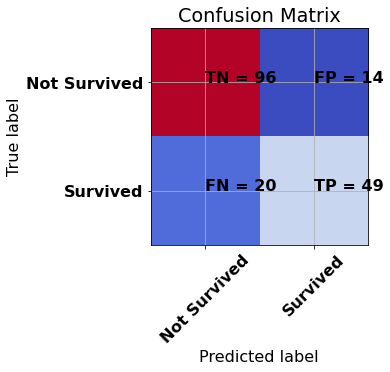

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
test_acc = accuracy_score(y_test,Knn_y_pred_test)*100
test_bl_acc = balanced_accuracy_score(y_test,Knn_y_pred_test)*100
test_cm = confusion_matrix(y_test,Knn_y_pred_test)
test_report = classification_report(y_test,Knn_y_pred_test)

print("Test set | Accuracy is", test_acc)
print("Test set | Balance Accuracy is", test_bl_acc)
cm_plot(test_cm)
print(test_report)

### Try parameter K value between 1 and 20

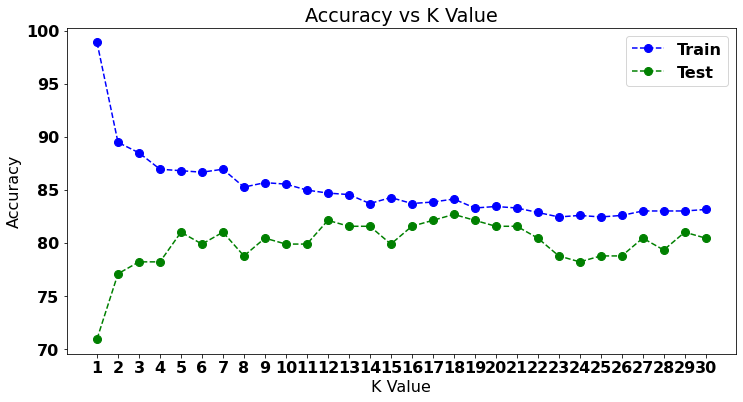

In [ ]:
K_start = 1
K_end = 30
acc_tr = []
acc_te = []
for i in range(K_start, K_end+1):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scal, y_train)
    pred_i_tr = knn.predict(X_train_scal)
    pred_i_te = knn.predict(X_test_scal)
    acc_tr.append(accuracy_score(y_train,pred_i_tr)*100)
    acc_te.append(accuracy_score(y_test,pred_i_te)*100)
    
### Plot 
plt.figure(figsize=(12, 6))
plt.plot(range(K_start, K_end+1), acc_tr, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=8,label="Train")
plt.plot(range(K_start, K_end+1), acc_te, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=8,label="Test")
plt.legend()
plt.xticks(np.arange(K_start, K_end+1, 1))
plt.title('Accuracy vs K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy')
plt.show()

ทดสอบ



***
# <center><font color=green> Bagging Tree </font></center>

In [9]:
from sklearn.ensemble import BaggingClassifier

__Bootstrap aggregating__ , also called __bagging__, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting.

__Parameter__
- __base_estimator (default=None)__ : The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a decision tree.
- __n_estimators (default=10)__ : The number of base estimators in the ensemble.
- __max_features (default=1.0)__: The number of features to draw from X to train each base estimator.
> If int, then draw max_features features. <br>
> If float, then draw max_features * no.features.
- __bootstrap (default=True)__: Whether samples are drawn with replacement.
- __bootstrap_features (default=False)__: Whether features are drawn with replacement.

### Training model

In [13]:
tree1 = DecisionTreeClassifier()

bagging_tree = BaggingClassifier(base_estimator=tree1,
                                 n_estimators=500,
                                 max_features=1.0)

bagging_tree = bagging_tree.fit(X_train, y_train) 

### Prediction

In [14]:
bagging_y_pred_train = bagging_tree.predict(X_train)
bagging_y_pred_test  = bagging_tree.predict(X_test)

In [15]:
print('Target classes of the first five rows are {}'.format(y_test.values[0:5]))
print('Predicted classes of the first five rows are {}'.format(bagging_y_pred_test[0:5]))

Target classes of the first five rows are [0 0 0 0 1]
Predicted classes of the first five rows are [0 0 0 0 0]


### Evaluation

Test set | Accuracy is 81.00558659217877
Test set | Balance Accuracy is 79.14361001317522


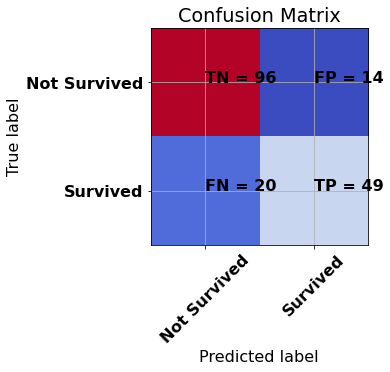

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [29]:
test_acc = accuracy_score(y_test,bagging_y_pred_test)*100
test_bl_acc = balanced_accuracy_score(y_test,bagging_y_pred_test)*100
test_cm = confusion_matrix(y_test,bagging_y_pred_test)
test_report = classification_report(y_test,bagging_y_pred_test)

print("Test set | Accuracy is", test_acc)
print("Test set | Balance Accuracy is", test_bl_acc)
cm_plot(test_cm)
print(test_report)

***
# <center><font color=green> Boosting Tree</font></center>

In [30]:
from sklearn.ensemble import AdaBoostClassifier

__Boosting__ is a machine learning ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones.

__Parameter__
- __base_estimator (default=None)__ : The base estimator from which the boosted ensemble is built
- __n_estimators (default=50)__ : The maximum number of estimators at which boosting is terminated
- __learning_rate (default=1.)__ : Learning rate shrinks the contribution of each classifier

### Training model

In [31]:
Tree = DecisionTreeClassifier()
boosting = AdaBoostClassifier(base_estimator=Tree,n_estimators=50)
boosting = boosting.fit(X_train, y_train)

### Prediction

In [32]:
boosting_y_pred_train = boosting.predict(X_train)
boosting_y_pred_test  = boosting.predict(X_test)

In [33]:
print('Target classes of the first five rows are {}'.format(y_test.values[0:5]))
print('Predicted classes of the first five rows are {}'.format(boosting_y_pred_test[0:5]))

Target classes of the first five rows are [0 0 0 0 1]
Predicted classes of the first five rows are [1 0 0 0 0]


### Evaluation

Test set | Accuracy is 77.6536312849162
Test set | Balance Accuracy is 76.41633728590251
 


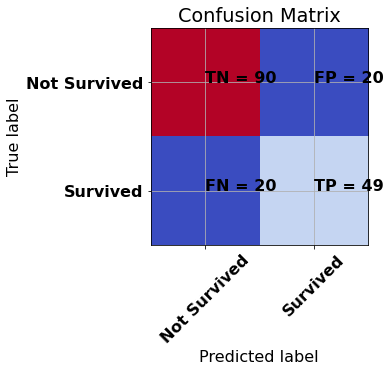

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       110
           1       0.71      0.71      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



In [34]:
test_acc = accuracy_score(y_test,boosting_y_pred_test)*100
test_bl_acc = balanced_accuracy_score(y_test,boosting_y_pred_test)*100
test_cm = confusion_matrix(y_test,boosting_y_pred_test)
test_report = classification_report(y_test,boosting_y_pred_test)

print("Test set | Accuracy is", test_acc)
print("Test set | Balance Accuracy is", test_bl_acc)
print(" ")
cm_plot(test_cm)
print(test_report)

***
# <center><font color=green> Random Forest </font></center>

In [35]:
from sklearn.ensemble import RandomForestClassifier

__RandomForestClassifier__ is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Some important parameters are:

- __n_estimators (default=10)__ : The number of trees in the forest.
- __criterion (default=”gini”)__ : The function to measure the quality of a split. “gini” for the Gini impurity and “entropy” for the information gain.
- __max_depth (default=None)__ : The maximum depth of the tree.
- __min_samples_split (default=2)__ : The minimum number of samples required to split an internal node
- __max_features (default=”auto”)__ : The number of features to consider when looking for the best split:
> If “auto”, then max_features=sqrt(n_features)

### Training model

In [36]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

### Prediction

In [37]:
rf_y_pred_train =  rf.predict(X_train)
rf_y_predprob_train =  rf.predict_proba(X_train)

rf_y_pred_test =  rf.predict(X_test)
rf_y_predprob_test =  rf.predict_proba(X_test)

print('Test set record')
print('Class prediction : {}'.format(rf_y_pred_test[1]))
print('Probability prediction : {}'.format(rf_y_predprob_test[1]))

Test set record
Class prediction : 0
Probability prediction : [0.85603337 0.14396663]


In [38]:
print('Target classes of the first five rows are {}'.format(y_test.values[0:5]))
print('Predicted classes of the first five rows are {}'.format(rf_y_pred_test[0:5]))

Target classes of the first five rows are [0 0 0 0 1]
Predicted classes of the first five rows are [0 0 0 0 1]


### Feature_importances

In [39]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(featurename, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Fare                 Importance: 0.215
Variable: Age                  Importance: 0.203
Variable: Title_Mr             Importance: 0.102
Variable: Sex_female           Importance: 0.094
Variable: Sex_male             Importance: 0.077
Variable: Pclass               Importance: 0.071
Variable: FamilySize           Importance: 0.048
Variable: SibSp                Importance: 0.038
Variable: Cabin                Importance: 0.037
Variable: Parch                Importance: 0.022
Variable: Title_Mrs            Importance: 0.022
Variable: Embarked_S           Importance: 0.015
Variable: Title_Miss           Importance: 0.014
Variable: Embarked_C           Importance: 0.014
Variable: Title_Master         Importance: 0.013
Variable: Embarked_Q           Importance: 0.008
Variable: Title_Rare           Importance: 0.005


### Evaluation

Test set | Accuracy is 78.77094972067039
Test set | Balance Accuracy is 77.32542819499342


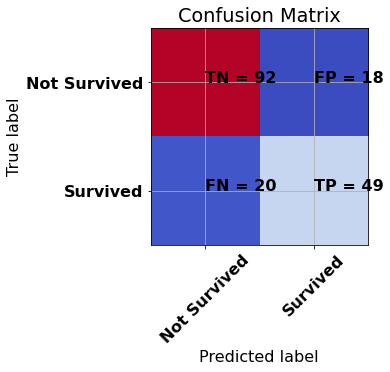

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [ ]:
test_acc = accuracy_score(y_test,rf_y_pred_test)*100
test_bl_acc = balanced_accuracy_score(y_test,rf_y_pred_test)*100
test_cm = confusion_matrix(y_test,rf_y_pred_test)
test_report = classification_report(y_test,rf_y_pred_test)

print("Test set | Accuracy is", test_acc)
print("Test set | Balance Accuracy is", test_bl_acc)
cm_plot(test_cm)
print(test_report)

<a id = 'xgb'><a>
***
# <center><font color=green> XGboost </font></center>

In [ ]:
from  xgboost import XGBClassifier, plot_importance

__XGBoost__ is an implementation of gradient boosted decision trees designed for speed and performance.

__Parameters for Tree Booster__


learning_rate (float) – Boosting learning rate (xgb’s “eta”)
n_estimators (int) – Number of boosted trees to fit.


- __max_depth (default=3)__: Maximum tree depth for base learners.
- __learning_rate (default=0.1)__: Boosting learning rate
- __n_estimators (default=100)__: Number of boosted trees to fit.
- __gamma (default=0)__: Minimum loss reduction required to make a further partition on a leaf node of the tree.

### Training model

In [ ]:
xgb = XGBClassifier(gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100)
xgb.fit(X_train,y_train)

XGBClassifier()

### Prediction

In [ ]:
xgb_y_pred_train = xgb.predict(X_train)
xgb_y_pred_test = xgb.predict(X_test)
xgb_y_pred_test[0:10]

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0])

### Feature_importances

In [ ]:
xgb.feature_importances_

array([0.09926385, 0.02031761, 0.02353436, 0.01964627, 0.0461355 ,
       0.03226274, 0.05305248, 0.00959946, 0.        , 0.47744703,
       0.00654792, 0.10399684, 0.01951331, 0.        , 0.01561164,
       0.03995357, 0.03311744], dtype=float32)

In [ ]:
importances = list(xgb.feature_importances_)
feature_importances = [(feature, round(importance,2)) for feature, importance in zip(featurename, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {:.2f}'.format(*pair)) for pair in feature_importances];

Variable: Title_Mr             Importance: 0.48
Variable: Pclass               Importance: 0.10
Variable: Title_Rare           Importance: 0.10
Variable: FamilySize           Importance: 0.05
Variable: Cabin                Importance: 0.05
Variable: Embarked_Q           Importance: 0.04
Variable: Fare                 Importance: 0.03
Variable: Embarked_S           Importance: 0.03
Variable: Age                  Importance: 0.02
Variable: SibSp                Importance: 0.02
Variable: Parch                Importance: 0.02
Variable: Sex_female           Importance: 0.02
Variable: Embarked_C           Importance: 0.02
Variable: Title_Master         Importance: 0.01
Variable: Title_Mrs            Importance: 0.01
Variable: Title_Miss           Importance: 0.00
Variable: Sex_male             Importance: 0.00


### Evalution

Test set | Accuracy is 83.79888268156425
Test set | Balance Accuracy is 81.68642951251647


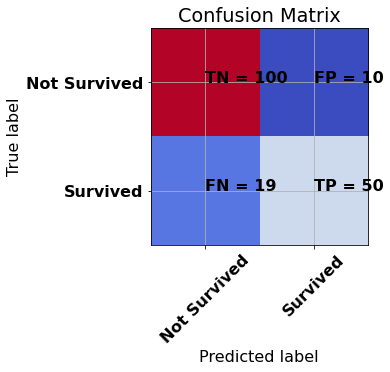

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       110
           1       0.83      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



In [ ]:
test_acc = accuracy_score(y_test,xgb_y_pred_test)*100
test_bl_acc = balanced_accuracy_score(y_test,xgb_y_pred_test)*100
test_cm = confusion_matrix(y_test,xgb_y_pred_test)
test_report = classification_report(y_test,xgb_y_pred_test)

print("Test set | Accuracy is", test_acc)
print("Test set | Balance Accuracy is", test_bl_acc)
cm_plot(test_cm)
print(test_report)

# Model Comparison

### Prediction

In [ ]:
DT_y_pred_test = DTree_Clf2.predict(X_test)
NB_y_pred_test = gnb.predict(X_test)
Knn_y_pred_test =  neigh.predict(X_test_scal)
bagging_y_pred_test  = bagging_tree.predict(X_test)
boosting_y_pred_test  = boosting.predict(X_test)
rf_y_pred_test =  rf.predict(X_test)
xgb_y_pred_test = xgb.predict(X_test)

model_name = ['Decision_tree', 'Naive bayes', 'K-NN', 'Bagging_tree', 'Boosting_tree', 'Random_forest', 'Xgboost']
pred = [DT_y_pred_test, NB_y_pred_test, Knn_y_pred_test, bagging_y_pred_test, boosting_y_pred_test, rf_y_pred_test,
        xgb_y_pred_test]

### Accuracy

In [ ]:
# Define function accuracy .
Acc = lambda predict : accuracy_score(y_test,predict)*100

# Apply function to each prediction in pred list. (HADOOP concept)
Accuracy = list(map(Acc, pred))

# Match model name and Accuracy 
Accuracy = zip(model_name, Accuracy)

# Sort by Accuracy 
Accuracy = sorted(Accuracy, key = lambda x: x[1], reverse = True)
[print('Model: {:20} Accuracy: {:.2f}'.format(*pair)) for pair in Accuracy];

Model: Xgboost              Accuracy: 83.80
Model: Decision_tree        Accuracy: 81.56
Model: K-NN                 Accuracy: 81.01
Model: Naive bayes          Accuracy: 80.45
Model: Bagging_tree         Accuracy: 80.45
Model: Random_forest        Accuracy: 78.77
Model: Boosting_tree        Accuracy: 76.54


### Balance Accuracy

In [ ]:
B_Acc = lambda pred : balanced_accuracy_score(y_test,pred)*100
balanced_accuracy = list(map(B_Acc, pred))
balanced_accuracy = zip(model_name, balanced_accuracy)
balanced_accuracy = sorted(balanced_accuracy, key = lambda x: x[1], reverse = True)

[print('Model: {:20} balanced_accuracy: {:.2f}'.format(*pair)) for pair in balanced_accuracy];

Model: Xgboost              balanced_accuracy: 81.69
Model: Naive bayes          balanced_accuracy: 80.04
Model: Decision_tree        balanced_accuracy: 79.60
Model: K-NN                 balanced_accuracy: 79.14
Model: Bagging_tree         balanced_accuracy: 78.96
Model: Random_forest        balanced_accuracy: 77.33
Model: Boosting_tree        balanced_accuracy: 75.24


### Precision

In [ ]:
Pc = lambda pred : precision_score(y_test,pred)*100
precision = list(map(Pc, pred))
precision = zip(model_name, precision)
precision = sorted(precision, key = lambda x: x[1], reverse = True)

[print('Model: {:20} precision: {:.2f}'.format(*pair)) for pair in precision];

Model: Xgboost              precision: 83.33
Model: Decision_tree        precision: 79.03
Model: K-NN                 precision: 77.78
Model: Bagging_tree         precision: 75.76
Model: Random_forest        precision: 73.13
Model: Naive bayes          precision: 72.97
Model: Boosting_tree        precision: 69.57


### Recall

In [ ]:
rc = lambda pred : recall_score(y_test,pred)*100
recall = list(map(rc, pred))
recall = zip(model_name, recall)
recall = sorted(recall, key = lambda x: x[1], reverse = True)

[print('Model: {:20} recall: {:.2f}'.format(*pair)) for pair in recall];

Model: Naive bayes          recall: 78.26
Model: Bagging_tree         recall: 72.46
Model: Xgboost              recall: 72.46
Model: Decision_tree        recall: 71.01
Model: K-NN                 recall: 71.01
Model: Random_forest        recall: 71.01
Model: Boosting_tree        recall: 69.57
